In [2692]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2693]:
df=pd.read_csv('expenses.csv')

In [2694]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2695]:
df.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [2696]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

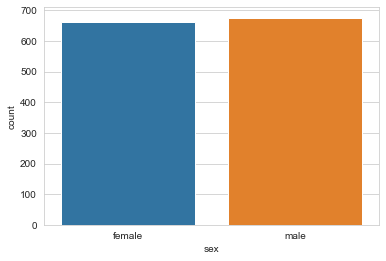

In [2697]:
sns.countplot(x='sex',data=df)

Text(0.5, 0, 'medical expenditure')

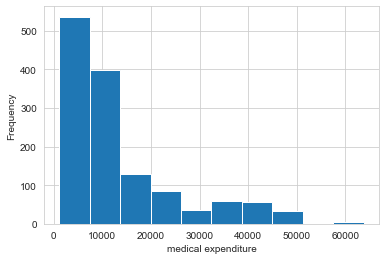

In [2698]:
sns.set_style('whitegrid')
df['charges'].plot.hist()
plt.xlabel('medical expenditure')

In [2699]:
#removing the outlier

In [2700]:
df1=df[(df['charges']<45000)]
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:xlabel='charges', ylabel='Count'>

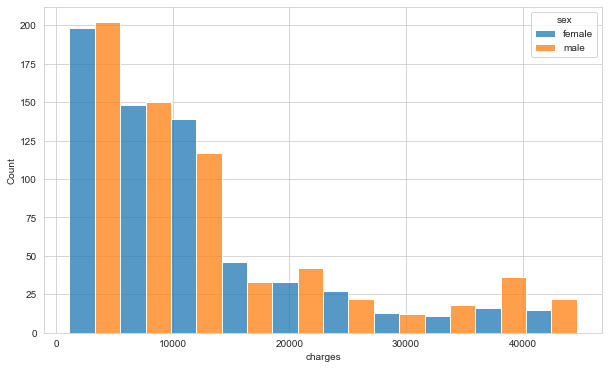

In [2701]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.histplot(x='charges',data=df1,hue='sex',bins=10,multiple='dodge')

<AxesSubplot:xlabel='region', ylabel='count'>

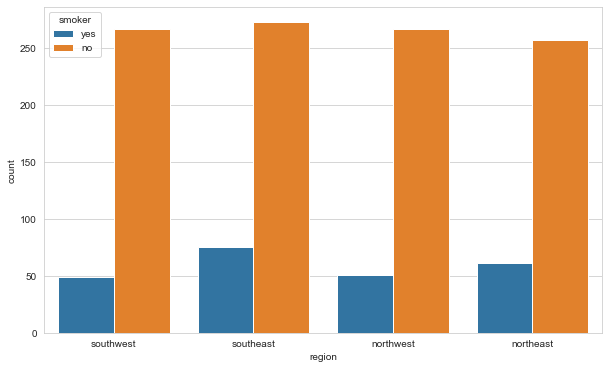

In [2702]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='region',data=df1,hue='smoker')

In [ ]:
#mean expenditure of smokers vs non smokers

<AxesSubplot:xlabel='smoker'>

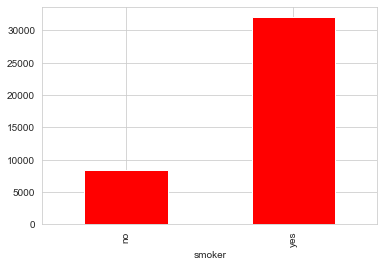

In [2703]:
x1=df.groupby('smoker')['charges'].mean()
x1.plot.bar(color='r')

In [2704]:
#splitting of data

In [2705]:
sex1=pd.get_dummies(df1['sex'],drop_first=True,prefix='sex')
smoker1=pd.get_dummies(df1['smoker'],drop_first=True,prefix='smoker')
region1=pd.get_dummies(df1['region'],drop_first=True,prefix='region')
df=pd.concat([df1,sex1,smoker1,region1],axis=1)
df.drop(['sex','smoker','region'],axis=1,inplace=True)
X=df.drop('charges',axis=1).values
y=df['charges'].values
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [2706]:
#splitting of data

In [2707]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [2708]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_test.shape

(325, 8)

In [2709]:
#use of ANN to predict the Insurance premium

In [2710]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2711]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1)

In [2712]:
model=Sequential()

In [2713]:
model.add(Dense(8, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mae')

In [2714]:
model.fit(x=X_train,y=y_train,epochs=500,verbose=1,callbacks=[early_stop],batch_size=64,validation_data=(X_test,y_test))

Epoch 1/500
16/16 [==============================] - 0s 9ms/step - loss: 12254.1553 - val_loss: 12116.9873
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 12253.6943 - val_loss: 12116.4531
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 12252.8711 - val_loss: 12115.1035
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 12250.7676 - val_loss: 12111.8086
Epoch 5/500
16/16 [==============================] - 0s 2ms/step - loss: 12245.6396 - val_loss: 12103.6592
Epoch 6/500
16/16 [==============================] - 0s 2ms/step - loss: 12233.2002 - val_loss: 12084.4834
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 12205.3691 - val_loss: 12043.1943
Epoch 8/500
16/16 [==============================] - 0s 2ms/step - loss: 12148.1758 - val_loss: 11961.1631
Epoch 9/500
16/16 [==============================] - 0s 2ms/step - loss: 12035.8340 - val_loss: 11810.2051
Epoch 10/500
16/16 [=================

<AxesSubplot:>

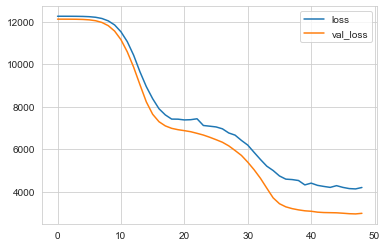

In [2715]:
df2=pd.DataFrame(model.history.history)
df2.plot()

In [2716]:
model.evaluate(X_test,y_test)

11/11 [==============================] - 0s 727us/step - loss: 2973.5623


2973.562255859375

In [2717]:
model_predictions= model.predict(X_test)
model_predictions.shape

(325, 1)

In [2718]:
model_predictions=pd.Series(model_predictions.reshape(325,),name='predicted values')

In [2719]:
predict_df=pd.DataFrame(y_test,columns=['true test value'])

In [2720]:
predict_df=pd.concat([predict_df,model_predictions],axis=1)
predict_df

,true test value,predicted values
0,12574.04900,11435.563477
1,8827.20990,8739.681641
2,35491.64000,25016.785156
3,9863.47180,9562.052734
4,2974.12600,2487.714355
...,...,...
320,36898.73308,24124.560547
321,13887.20400,12468.826172
322,36189.10170,24917.441406
323,26236.57997,8591.255859
